## Numerical analysis for the error equatinon of the first system

$$
f(\alpha)=(1+\alpha^{2}x_{0}^{2})^{\frac{N+1}{2}} \frac{1}{\alpha^{N}}
$$

In [68]:
import numpy as np
import sympy 
import matplotlib.pyplot as plt
from math import *

We try to take the derivative of $f(\alpha)$, then we got
$$
f'(\alpha)=\frac{(n+1)x_{0}^2(1+\alpha^{2}x_{0}^2)^{\frac{N-1}{2}}-N\alpha^{N-1}(1+\alpha^{2}x_{0}^{2})^{\frac{N+1}{2}}}{\alpha^{2N}}
$$
Make $f'(\alpha)=0$, then we have
$$
Nx_{0}^{2}\alpha^{N+1} +N\alpha^{N-1} - (N+1)x_{0}^{2} = 0
$$

In [69]:
def f(x, x0=0.1, N=4):
    exp_num = (N + 1) / 2
    return (1 + x ** 2 * x0 ** 2) ** exp_num / x ** N


0.1


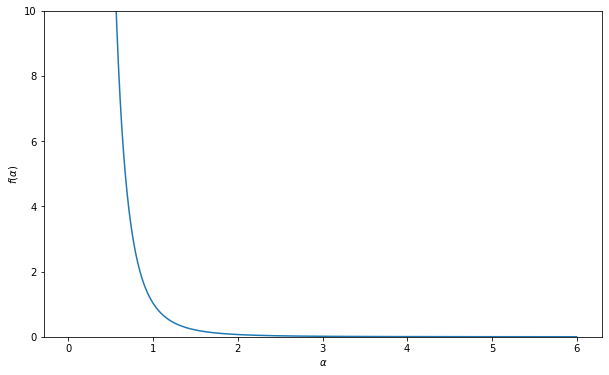

0.4


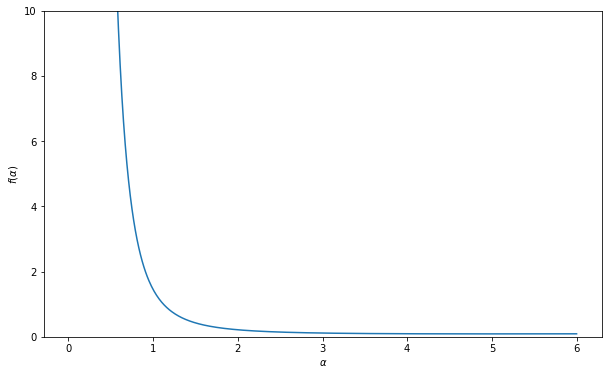

0.7


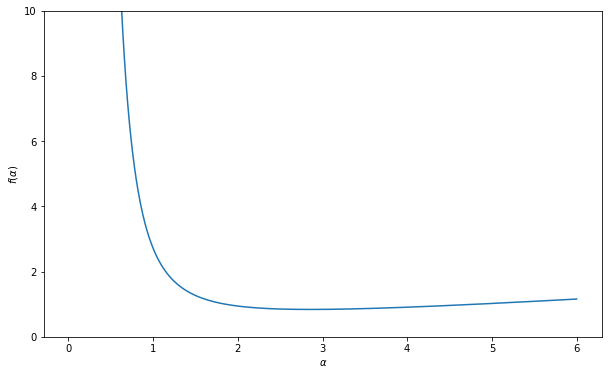

In [70]:
x = x = np.linspace(0.01, 6, 600)
for i in range(1, 10, 3):
  i = i/10
  print(i)
  y = f(x, x0=i)
  plt.figure(figsize=(10, 6))
  plt.plot(x, y)
  plt.ylim([0, 10])
  plt.xlabel(r'$\alpha$')
  plt.ylabel(r'$f(\alpha)$')
  plt.show()

---

### Analysis Part for the equation

Since for Carleman linearlization, the order $N$ is most not larger than 6, therefore, here we disguess above the cases from $N=2$ to $N=5$. And we try to see the result from different value of $x_{0}$. Also, we have to satisfy our boundary condition that $\alpha>\frac{2 a x_0}{\sqrt{1-4 a^2 x_0^4}}$ and $a x_0^2<\frac{1}{2}$. Since the condition $a x_0^2<\frac{1}{2}$ is necessary for the system to converge, so we assume it to be default and we will only consider the case that $a x_0^2<\frac{1}{2}$.
$$
\begin{cases}
\alpha>\frac{2 a x_0}{\sqrt{1-4 a^2 x_0^4}} \\
a x_0^2<\frac{1}{2}
\end{cases}
$$
It's easy to find that the behavior of the function depends on $N$ and $x_{0}$. Here we set $a = 1$ and $N = 2,3,4,5$.

In [35]:
def f_deriv(x, x0=0.1, N=4):
    part1 = N * x0 ** 2 * x ** (N + 1)
    part2 = N * x ** (N - 1)
    part3 = (N + 1) * x0 ** 2
    return part1 + part2 - part3

def bourdary(x0, a):
    return (2 * a * x0) / sqrt(1 - 4 * a ** 2 * x0 ** 4)

#### Case 1: $N=2$

After we plug in the value of $N=2$, we have
$$
2x_{0}^{2}\alpha^{3} +2\alpha - 3x_{0}^{2} = 0
$$
Here we have a equation which the highest power of $\alpha$ is 3, so we can use the Cardano formula to compute it. since $\Delta = (\frac{2}{3})^3 + (\frac{3x_{0}}{2})^2 > 0$. There exist one real root and two complex conjugate roots. We only need to consider the real root. Then we have the solution for $\alpha$:
$$
\alpha_1 = \sqrt[3]{-\frac{3x_{0}}{2}+\sqrt{\left(\frac{3x_{0}}{2}\right)^2+\left(\frac{2}{3}\right)^3}}+\sqrt[3]{-\frac{3x_{0}}{2}-\sqrt{\left(\frac{3x_{0}}{2}\right)^2+\left(\frac{2}{3}\right)^3}}
$$


The real root of the function is  0.363038188779934
The boundary of the function is  0.010000125002343799


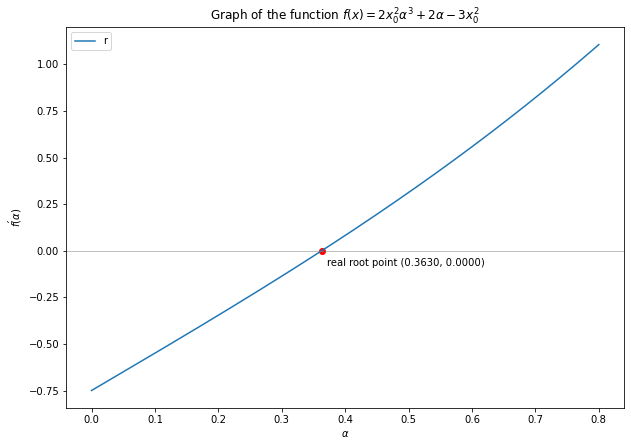

In [79]:
def solve_equation(x0):
    alpha = sympy.Symbol('alpha')
    eq = 2*x0**2*alpha**3 + 2*alpha - 3*x0**2
    sol = sympy.solve(eq, alpha)
    return sol
  
x0 = 0.5
alpha = solve_equation(x0)
print('The real root of the function is ', alpha[0]) # the real root
print('The boundary of the function is ', bourdary(x0, a=0.01)) # the boundary

x = np.linspace(0, 0.8, 1000)
y = f_deriv(x, x0=x0, N=2)

plt.figure(figsize=(10, 7))
plt.plot(x, y, label='r')
plt.title(r'Graph of the function $f(x)=2x_{0}^{2}\alpha^{3} +2\alpha - 3x_{0}^{2}$')
plt.axhline(y=0, color='gray', linewidth=0.5)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$f\'(\alpha)$')
point = (alpha[0], 0)

# Add scatter and annotation
plt.scatter(point[0], point[1], color='red')
plt.annotate(f'real root point ({point[0]:.4f}, {point[1]:.4f})', xy=point, xytext=(5, -15), textcoords='offset points')

plt.legend()
plt.show()



From the result, we can see that our real root is less than the boundary condition, therefore

In [ ]:
x = x = np.linspace(0.01, 6, 600)
y = f(x, x0=0.1, N=2)
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.ylim([0, 10])
plt.xlabel(r'$\alpha$')
  plt.ylabel(r'$f(\alpha)$')
  plt.show()